# 1. Comparing multi-class classifiers for handwritten digits classification. 

In [ ]:
import scipy.io
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
mnist = scipy.io.loadmat('mnist_10digits.mat')

# Extract the train and test data
x_train = mnist['xtrain'].T  # Transpose to adjust shape to (samples, features)
y_train = mnist['ytrain'][0]  # Simplify the shape to (samples,)
x_test = mnist['xtest'].T
y_test = mnist['ytest'][0]

# Standardize the features by dividing by 255
x_train = x_train / 255.0
x_test = x_test / 255.0


In [11]:
# Correct the shape of the datasets
x_train = x_train.T  # Ensure it is (60000, 784)
x_test = x_test.T    # Ensure it is (10000, 784)

# Confirm the shapes again
print('Corrected Shapes:', x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Now proceed with setting up and training classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": SVC(kernel='linear'),
    "Kernel SVM": SVC(kernel='rbf'),
    "Neural Networks": MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000)
}

results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(x_train, y_train)  # Training on the correctly shaped data
    y_pred = clf.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9])
    results[name] = {
        "Confusion Matrix": conf_matrix,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": fscore
    }

# Output results
for name, metrics in results.items():
    print(f"\nClassifier: {name}")
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    for i in range(10):  # Loop through digits 0-9
        print(f"Metrics for digit {i}:")
        print(f" Precision: {metrics['Precision'][i]}")
        print(f" Recall: {metrics['Recall'][i]}")
        print(f" F1 Score: {metrics['F1 Score'][i]}")


Corrected Shapes: (60000, 784) (60000,) (10000, 784) (10000,)
Training KNN...
Training Logistic Regression...
Training Linear SVM...
Training Kernel SVM...
Training Neural Networks...

Classifier: KNN
Confusion Matrix:
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]
Metrics for digit 0:
 Precision: 0.9662698412698413
 Recall: 0.9938775510204082
 F1 Score: 0.9798792756539236
Metrics for digit 1:
 Precision: 0.9577345731191885
 Recall: 0.9982378854625551
 F1 Score: 0.9775668679896462
Metrics for digit 2:
 Precisi

## Best K for KNN

In [11]:
import scipy.io

# Load the MNIST dataset
data = scipy.io.loadmat('mnist_10digits.mat')

# Print all keys in the dataset to find the correct variable names
print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'xtrain', 'ytrain', 'xtest', 'ytest'])


In [13]:
import scipy.io
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
data = scipy.io.loadmat('mnist_10digits.mat')
X_train = data['xtrain']
y_train = data['ytrain'].flatten()
X_test = data['xtest']
y_test = data['ytest'].flatten()

# Standardize the features by scaling pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Initialize variables to store the best performance metrics
best_k = 0
highest_accuracy = 0

# Define a range of k values to test
k_values = list(range(1, 22, 2))

# Loop over the range of k values to find the best one
for k in k_values:
    # Initialize and train the KNN classifier for the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate and print the accuracy for the current k value
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")
    
    # Update the best k if the current model's accuracy is higher
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_k = k

# Print out the best k and its accuracy
print(f"Best k: {best_k} with highest accuracy: {highest_accuracy}")

# Train the KNN classifier using the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = knn_best.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)

# Print the final accuracy
print(f"Final accuracy with k={best_k}: {final_accuracy}")


Accuracy for k=1: 0.9691
Accuracy for k=3: 0.9705
Accuracy for k=5: 0.9688
Accuracy for k=7: 0.9694
Accuracy for k=9: 0.9659
Accuracy for k=11: 0.9668
Accuracy for k=13: 0.9653
Accuracy for k=15: 0.9633
Accuracy for k=17: 0.963
Accuracy for k=19: 0.9632
Accuracy for k=21: 0.963
Best k: 3 with highest accuracy: 0.9705
Final accuracy with k=3: 0.9705


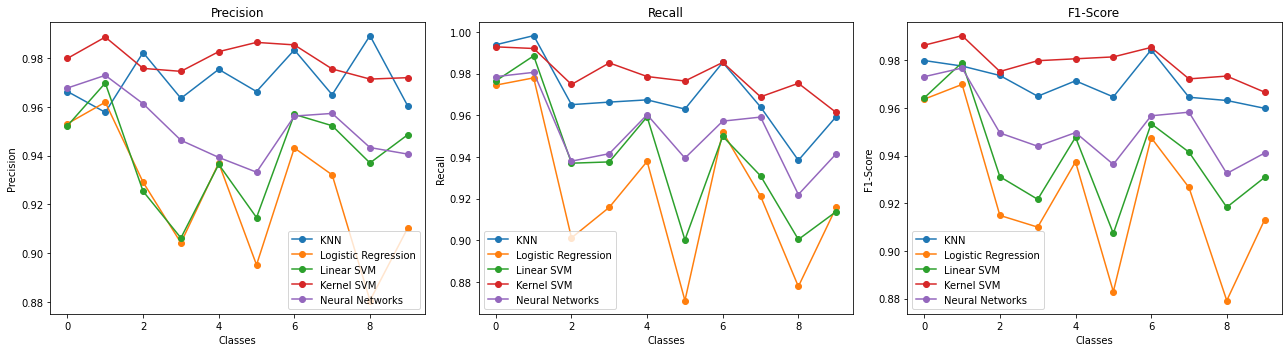

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data for each classifier
metrics = {
    "KNN": {
        "Precision": [0.9662698412698413, 0.9577345731191885, 0.9822485207100592, 0.9634748272458046, 0.9753593429158111,
                      0.9662542182227222, 0.9833333333333333, 0.9649464459591042, 0.9891774891774892, 0.9603174603174603],
        "Recall": [0.9938775510204082, 0.9982378854625551, 0.9651162790697675, 0.9663366336633663, 0.9674134419551935,
                   0.9630044843049327, 0.9853862212943633, 0.9640077821011673, 0.9383983572895277, 0.9593657086223984],
        "F1 Score": [0.9798792756539236, 0.9775668679896462, 0.9736070381231672, 0.9649036085022246, 0.9713701431492843,
                     0.9646266142616507, 0.9843587069864442, 0.9644768856447687, 0.9631190727081138, 0.9598413485374319]
    },
    "Logistic Regression": {
        "Precision": [0.9530938123752495, 0.9618717504332756, 0.929070929070929, 0.9042033235581622, 0.9369277721261444,
                      0.8951612903225806, 0.9431230610134437, 0.9320866141732284, 0.8805355303810505, 0.9103448275862069],
        "Recall": [0.9744897959183674, 0.9779735682819384, 0.9011627906976745, 0.9158415841584159, 0.9378818737270875,
                   0.8710762331838565, 0.9519832985386222, 0.9212062256809338, 0.87782340862423, 0.9157581764122894],
        "F1 Score": [0.963673057517659, 0.9698558322411535, 0.9149040826364978, 0.9099852434825382, 0.9374045801526717,
                     0.8829545454545454, 0.9475324675324676, 0.9266144814090019, 0.8791773778920309, 0.9130434782608695]
    },
    "Linear SVM": {
        "Precision": [0.9522388059701492, 0.9697493517718236, 0.9253588516746412, 0.9062200956937799, 0.9363817097415507,
                      0.9145785876993167, 0.9568874868559412, 0.9522388059701492, 0.936965811965812, 0.948559670781893],
        "Recall": [0.976530612244898, 0.9885462555066079, 0.937015503875969, 0.9376237623762376, 0.9592668024439919,
                   0.9002242152466368, 0.9498956158663883, 0.9309338521400778, 0.9004106776180698, 0.9137760158572844],
        "F1 Score": [0.9642317380352645, 0.9790575916230365, 0.9311506981222917, 0.9216545012165451, 0.9476861167002012,
                     0.9073446327683615, 0.9533787323205867, 0.9414658140678799, 0.9183246073298429, 0.9308430085815244]
    },
    "Kernel SVM": {
        "Precision": [0.9798590130916415, 0.9885864793678666, 0.9757516973811833, 0.9745347698334965, 0.9826175869120655,
                      0.986409966024915, 0.9853862212943633, 0.9755142017629774, 0.9713701431492843, 0.9719438877755511],
        "Recall": [0.9928571428571429, 0.9920704845814978, 0.9748062015503876, 0.9851485148514851, 0.9786150712830958,
                   0.976457399103139, 0.9853862212943633, 0.9688715953307393, 0.9753593429158111, 0.9613478691774033],
        "F1 Score": [0.9863152559553979, 0.990325417766051, 0.9752787203102279, 0.9798129000492368, 0.9806122448979592,
                     0.9814084507042253, 0.9853862212943633, 0.9721815519765739, 0.9733606557377049, 0.9666168410563029]
    },
    "Neural Networks": {
        "Precision": [0.9677093844601413, 0.9729020979020979, 0.9612711022840119, 0.9462686567164179, 0.9392430278884463,
                      0.933184855233853, 0.9562043795620438, 0.9572815533980582, 0.9432773109243697, 0.9405940594059405],
        "Recall": [0.9785714285714285, 0.9806167400881057, 0.937984496124031, 0.9415841584158415, 0.960285132382892,
                   0.9394618834080718, 0.9572025052192067, 0.9591439688715954, 0.9219712525667351, 0.9415262636273538],
        "F1 Score": [0.9731100963977676, 0.9767441860465116, 0.9494850416871016, 0.9439205955334987, 0.9496475327291037,
                     0.9363128491620112, 0.9567031820552947, 0.9582118561710399, 0.9325025960539979, 0.9410599306587419]
    }
}

# Prepare the plots
digits = np.arange(10)

plt.figure(figsize=(18, 5))

# Precision plot
plt.subplot(1, 3, 1)
for clf, data in metrics.items():
    plt.plot(digits, data["Precision"], marker='o', label=clf)
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision')
plt.legend()

# Recall plot
plt.subplot(1, 3, 2)
for clf, data in metrics.items():
    plt.plot(digits, data["Recall"], marker='o', label=clf)
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall')
plt.legend()

# F1-Score plot
plt.subplot(1, 3, 3)
for clf, data in metrics.items():
    plt.plot(digits, data["F1 Score"], marker='o', label=clf)
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Score')
plt.legend()

plt.tight_layout()
plt.show()


---

# 4. Feature selection and change-point detection

## Question 1

In [11]:
import numpy as np
from sklearn.metrics import mutual_info_score

# Data for "prize"
contingency_table_prize = np.array([[150, 10],
                                    [1000, 15000]])

# Data for "hello"
contingency_table_hello = np.array([[145, 15],
                                    [11000, 5000]])

# Flatten the contingency tables
data_prize = contingency_table_prize.flatten()
data_hello = contingency_table_hello.flatten()

# Compute the mutual information
mi_prize = mutual_info_score(None, None, contingency=data_prize.reshape(2, 2))
mi_hello = mutual_info_score(None, None, contingency=data_hello.reshape(2, 2))

# Output the results
print(f"Mutual Information for 'prize': {mi_prize}")
print(f"Mutual Information for 'hello': {mi_hello}")


Mutual Information for 'prize': 0.022846213392156336
Mutual Information for 'hello': 0.0013502788694247083


## Question 2

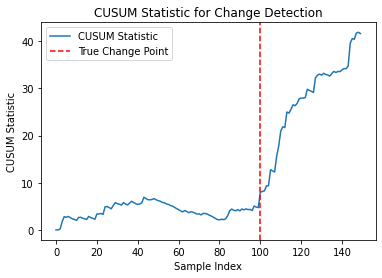

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu0, sigma0 = 0.1, 1
mu1, sigma1 = 0.5, 1.5

# Generate samples
np.random.seed(0)
x1 = np.random.normal(mu0, sigma0, 100)
x2 = np.random.normal(mu1, sigma1, 50)
x = np.concatenate((x1, x2))

# Function to calculate the log-likelihood ratio
def llr(x):
    return np.log(np.sqrt(1/1.5)) + ((x - mu0)**2 / (2 * sigma0**2)) - ((x - mu1)**2 / (2 * sigma1**2))

# Calculate the CUSUM statistic
S = np.zeros(len(x))
for i in range(1, len(x)):
    S[i] = max(0, S[i-1] + llr(x[i]))

# Plot the CUSUM statistic
plt.plot(S, label='CUSUM Statistic')
plt.axvline(x=100, color='r', linestyle='--', label='True Change Point')
plt.xlabel('Sample Index')
plt.ylabel('CUSUM Statistic')
plt.title('CUSUM Statistic for Change Detection')
plt.legend()
plt.show()


# 5. Medical imaging reconstruction

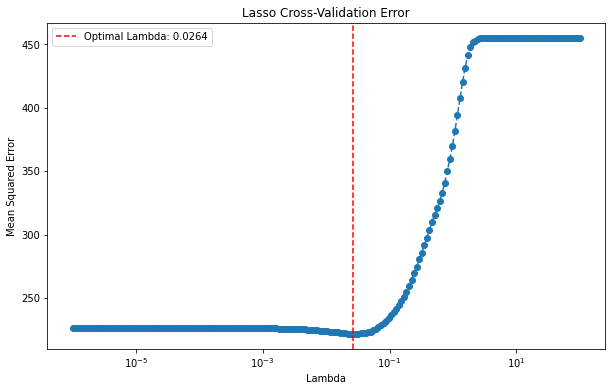

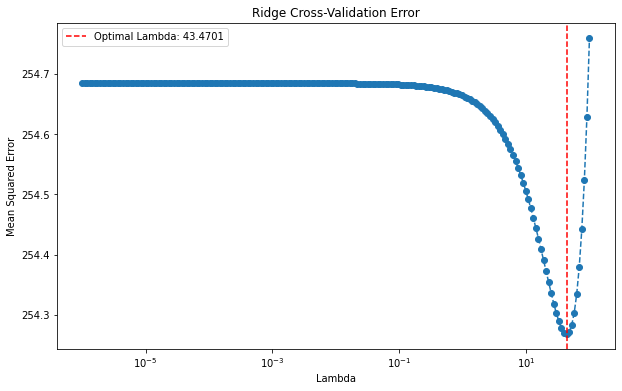

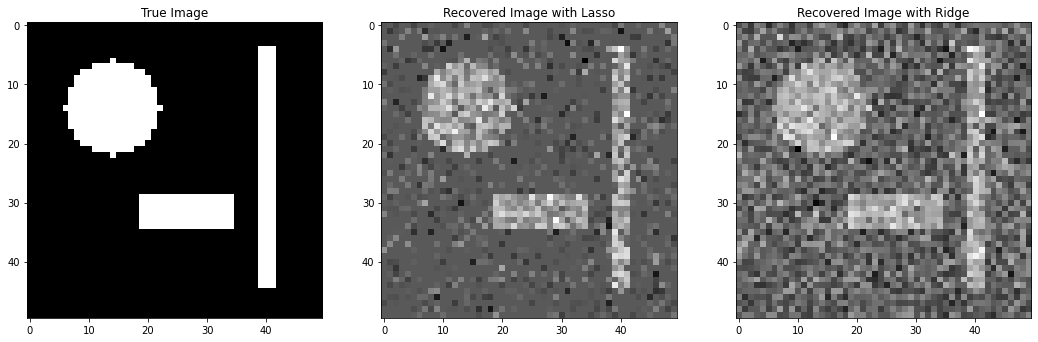

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Ridge
from sklearn.model_selection import GridSearchCV
from scipy.io import loadmat

# Load data from cs.mat
data = loadmat('cs.mat')
true_image = data['img'].flatten()  # Flatten the 50x50 image to a 2500-dimensional vector

# Generate the measurement matrix A and the noisy measurements y
np.random.seed(0)
A = np.random.randn(1300, 2500)
epsilon = np.random.normal(0, np.sqrt(25), 1300)
y = A @ true_image + epsilon

# Lasso Regression with Cross-Validation
lasso = LassoCV(cv=10, alphas=np.logspace(-6, 2, 200), max_iter=100000)
lasso.fit(A, y)

# Optimal lambda for Lasso
optimal_lambda = lasso.alpha_
mse_path = lasso.mse_path_.mean(axis=1)

# Plotting Lasso CV error curves
plt.figure(figsize=(10, 6))
plt.plot(lasso.alphas_, mse_path, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Cross-Validation Error')
plt.axvline(optimal_lambda, linestyle='--', color='r', label=f'Optimal Lambda: {optimal_lambda:.4f}')
plt.legend()
plt.show()

# Recovered Image using optimal lambda for Lasso
recovered_image = lasso.coef_

# Ridge Regression with Cross-Validation using GridSearchCV
alphas = np.logspace(-6, 2, 200)
ridge = Ridge()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(A, y)

# Optimal lambda for Ridge
optimal_lambda_ridge = grid_search.best_params_['alpha']
cv_results = grid_search.cv_results_
mean_test_scores = -cv_results['mean_test_score']

# Plotting Ridge CV error curves
plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_test_scores, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Cross-Validation Error')
plt.axvline(optimal_lambda_ridge, linestyle='--', color='r', label=f'Optimal Lambda: {optimal_lambda_ridge:.4f}')
plt.legend()
plt.show()

# Recovered Image using optimal lambda for Ridge
ridge_best = Ridge(alpha=optimal_lambda_ridge)
ridge_best.fit(A, y)
recovered_image_ridge = ridge_best.coef_

# Displaying the true image and recovered images from Lasso and Ridge
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(true_image.reshape(50, 50), cmap='gray')
plt.title('True Image')
plt.subplot(1, 3, 2)
plt.imshow(recovered_image.reshape(50, 50), cmap='gray')
plt.title('Recovered Image with Lasso')
plt.subplot(1, 3, 3)
plt.imshow(recovered_image_ridge.reshape(50, 50), cmap='gray')
plt.title('Recovered Image with Ridge')
plt.show()


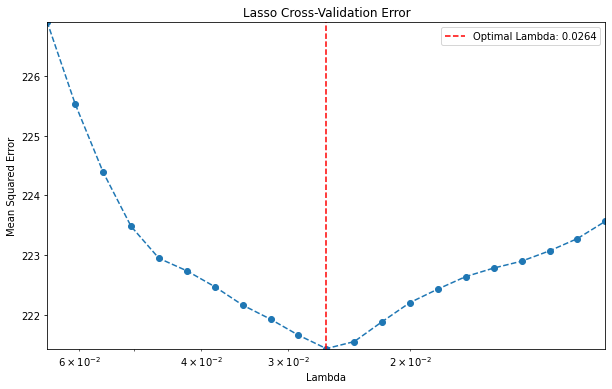

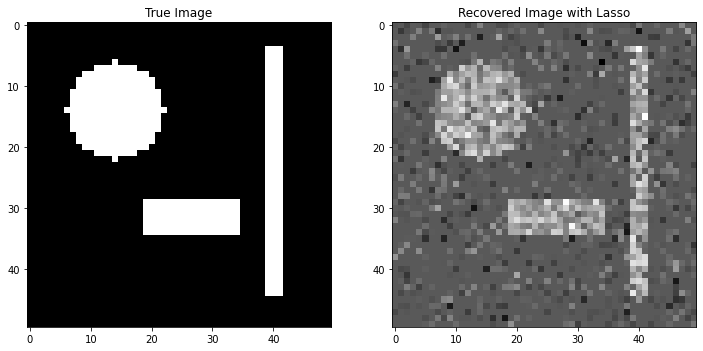

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from scipy.io import loadmat

# Step 1: Load data from cs.mat
data = loadmat('cs.mat')

# Use 'img' as the true image
true_image = data['img'].flatten()  # Flatten the 50x50 image to a 2500-dimensional vector

# Step 2: Generate the measurement matrix A and the noisy measurements y
np.random.seed(0)
A = np.random.randn(1300, 2500)
epsilon = np.random.normal(0, np.sqrt(25), 1300)
y = A @ true_image + epsilon

# Step 3: Lasso Regression with Cross-Validation
lasso = LassoCV(cv=10, alphas=np.logspace(-6, 2, 200), max_iter=100000)
lasso.fit(A, y)

# Optimal lambda
optimal_lambda = lasso.alpha_

# Cross-validation error curves
mse_path = lasso.mse_path_.mean(axis=1)

# Find the range around the optimal lambda for zooming
lambda_min_index = np.argmin(mse_path)
lambda_min = lasso.alphas_[lambda_min_index]
mse_min = mse_path[lambda_min_index]

# Determine zoom range
lambda_range = (lasso.alphas_[max(0, lambda_min_index-10)], lasso.alphas_[min(len(lasso.alphas_)-1, lambda_min_index+10)])
mse_range = (min(mse_path[lambda_min_index-10:lambda_min_index+10]), max(mse_path[lambda_min_index-10:lambda_min_index+10]))

# Plotting cross-validation error curves
plt.figure(figsize=(10, 6))
plt.plot(lasso.alphas_, mse_path, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Cross-Validation Error')
plt.axvline(optimal_lambda, linestyle='--', color='r', label=f'Optimal Lambda: {optimal_lambda:.4f}')
plt.legend()
plt.xlim(lambda_range)
plt.ylim(mse_range)
plt.show()

# Step 4: Recovered Image using optimal lambda
recovered_image = lasso.coef_

# Displaying the true image and recovered image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(true_image.reshape(50, 50), cmap='gray')
plt.title('True Image')
plt.subplot(1, 2, 2)
plt.imshow(recovered_image.reshape(50, 50), cmap='gray')
plt.title('Recovered Image with Lasso')
plt.show()


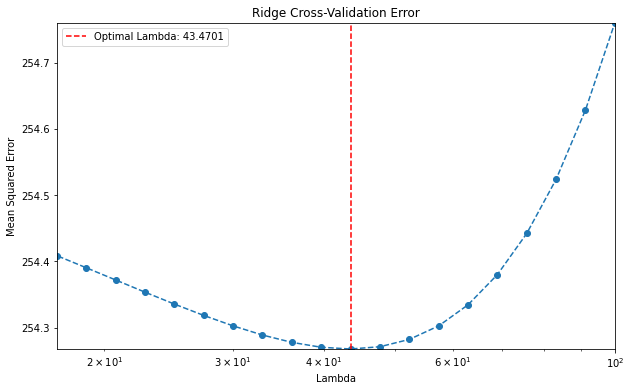

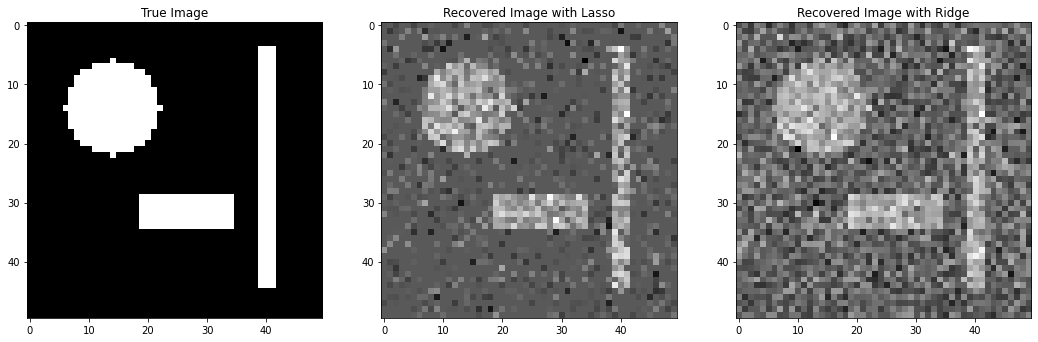

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from scipy.io import loadmat

# Step 1: Load data from cs.mat (already done in the previous step)
data = loadmat('cs.mat')
true_image = data['img'].flatten()  # Flatten the 50x50 image to a 2500-dimensional vector

# Step 2: Generate the measurement matrix A and the noisy measurements y (already done)
np.random.seed(0)
A = np.random.randn(1300, 2500)
epsilon = np.random.normal(0, np.sqrt(25), 1300)
y = A @ true_image + epsilon

# Step 3: Ridge Regression with Cross-Validation using GridSearchCV
alphas = np.logspace(-6, 2, 200)
ridge = Ridge()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(A, y)

# Optimal lambda
optimal_lambda_ridge = grid_search.best_params_['alpha']

# Cross-validation error curves
cv_results = grid_search.cv_results_
mean_test_scores = -cv_results['mean_test_score']

# Find the range around the optimal lambda for zooming
lambda_min_index_ridge = np.argmin(mean_test_scores)
lambda_min_ridge = alphas[lambda_min_index_ridge]
mse_min_ridge = mean_test_scores[lambda_min_index_ridge]

# Determine zoom range
lambda_range_ridge = (alphas[max(0, lambda_min_index_ridge-10)], alphas[min(len(alphas)-1, lambda_min_index_ridge+10)])
mse_range_ridge = (min(mean_test_scores[lambda_min_index_ridge-10:lambda_min_index_ridge+10]), max(mean_test_scores[lambda_min_index_ridge-10:lambda_min_index_ridge+10]))

# Plotting cross-validation error curves
plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_test_scores, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Cross-Validation Error')
plt.axvline(optimal_lambda_ridge, linestyle='--', color='r', label=f'Optimal Lambda: {optimal_lambda_ridge:.4f}')
plt.legend()
plt.xlim(lambda_range_ridge)
plt.ylim(mse_range_ridge)
plt.show()

# Step 4: Recovered Image using optimal lambda
ridge_best = Ridge(alpha=optimal_lambda_ridge)
ridge_best.fit(A, y)
recovered_image_ridge = ridge_best.coef_

# Displaying the true image and recovered images from Lasso and Ridge
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(true_image.reshape(50, 50), cmap='gray')
plt.title('True Image')
plt.subplot(1, 3, 2)
plt.imshow(recovered_image.reshape(50, 50), cmap='gray')
plt.title('Recovered Image with Lasso')
plt.subplot(1, 3, 3)
plt.imshow(recovered_image_ridge.reshape(50, 50), cmap='gray')
plt.title('Recovered Image with Ridge')
plt.show()
